In [1]:
import numpy as np
import scipy.stats as ss

In [2]:
norm_dist = ss.norm.rvs(size = 20)

In [5]:
norm_dist#这是符合标准正态分布的20个数

array([-0.93870295, -1.1386233 ,  1.46349365, -0.01205701, -1.41309955,
       -0.11468474, -1.22199511, -1.44719118,  0.50427001, -1.22986752,
        0.75146476,  1.65480822, -0.6609512 , -0.34414464,  0.28319859,
        0.08899084, -1.50125094,  1.10433287, -0.58153217,  0.13292741])

In [6]:
ss.normaltest(norm_dist)#检测是不是正态分布
#p值可以看出大于0.05 符合正态分布

NormaltestResult(statistic=1.6169872916014087, pvalue=0.4455286850069886)

In [7]:
ss.chi2_contingency([[15,95],[85,5]])#这里是求他的卡方分布的值X2为126那个数 p值为2.95e-29那个数 1是自由度 后面是它的理论分布

(126.08080808080808, 2.9521414005078985e-29, 1, array([[55., 55.],
        [45., 45.]]))

In [16]:
ss.ttest_ind(ss.norm.rvs(size = 10),ss.norm.rvs(size = 20))#这是t分布检验 里面两组数据是自己生成的正态分布数据 
#如果此时用0.05（置信度）为显著性比较的话 p值大于0.05 是复合t分布的 是满足假设的

Ttest_indResult(statistic=-0.74374122544075, pvalue=0.4632289204455061)

In [22]:
ss.ttest_ind(ss.norm.rvs(size = 100),ss.norm.rvs(size = 200))#数据越多 越能证明这两个正态分布是没有差别的 p值越大 越没有差别

Ttest_indResult(statistic=0.04951419862205865, pvalue=0.9605426919005183)

In [23]:
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])#这是F分布检验

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

In [26]:
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt

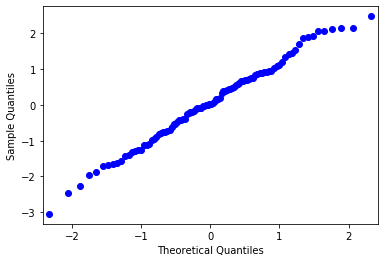

In [27]:
plt.show(qqplot(ss.norm.rvs(size = 100)))

# 相关系数的例子

In [28]:
import pandas as pd

In [29]:
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])

In [30]:
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])

In [31]:
s1.corr(s2)#s1和s2直接进行对比 得到相关系数

0.9333729600465923

In [32]:
s1.corr(s2,method = 'spearman')#可以指定求相关系数的方法

0.7142857142857144

In [33]:
df = pd.DataFrame([s1,s2])

In [34]:
df

0    1    2    3    4    5    6
0  0.1  0.2  1.1  2.4  1.3  0.3  0.5
1  0.5  0.4  1.2  2.5  1.1  0.7  0.1

In [35]:
df.corr()#针对列进行计算的 所以需要转换一下

0    1    2    3    4    5    6
0  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0
1  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0
2  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0
3  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0
4 -1.0 -1.0 -1.0 -1.0  1.0 -1.0  1.0
5  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0
6 -1.0 -1.0 -1.0 -1.0  1.0 -1.0  1.0

In [37]:
df = pd.DataFrame(np.array([s1,s2]).T)

In [38]:
df.corr()#转换好后就可以求出相关系数了

0         1
0  1.000000  0.933373
1  0.933373  1.000000

In [40]:
df.corr(method = 'spearman')

0         1
0  1.000000  0.714286
1  0.714286  1.000000

# 回归的例子

In [41]:
x = np.arange(10).astype(np.float).reshape((10,1))#中间那个是转换成float 后面是形状

In [42]:
y = x*3+4+np.random.random((10,1))#最后➕的是噪声，就是后面随机的小数点

In [43]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [44]:
y

array([[ 4.17965665],
       [ 7.78809841],
       [10.84307045],
       [13.32987945],
       [16.29897177],
       [19.195773  ],
       [22.10227309],
       [25.75105325],
       [28.58545194],
       [31.86560188]])

In [47]:
from sklearn.linear_model import LinearRegression#引入一个回归的方法
#可以去scikit-learn的官网看——API——看它的用法

In [48]:
reg = LinearRegression()#构建线性回归

In [49]:
reg = reg.fit(x,y)#拟合的过程

In [50]:
y_pred = reg.predict(x)#这是预测值

In [51]:
y_pred

array([[ 4.39828632],
       [ 7.41955225],
       [10.44081817],
       [13.4620841 ],
       [16.48335003],
       [19.50461595],
       [22.52588188],
       [25.54714781],
       [28.56841373],
       [31.58967966]])

In [55]:
reg.coef_#这是参数

array([[3.02126593]])

In [54]:
reg.intercept_#这是截距

array([4.39828632])

# PCA变幻

In [57]:
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T

In [58]:
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [59]:
from sklearn.decomposition import PCA#用来降维 这里其实还是用到量奇异值的方法 而不是PCA的方法

In [60]:
lower_dim = PCA(n_components=1)#降维到1维

In [61]:
lower_dim.fit(data)#可以得到维度的重要性

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
lower_dim.explained_variance_ratio_#降维后得到96%的信息量

array([0.96318131])

In [63]:
lower_dim.fit_transform(data)#得到转换后的数值

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [70]:
def myPCA(data,n_components = 100000000):#这里自定义PCA方法 默认指定很大的数
    mean_vals = np.mean(data,axis = 0)#这里针对列取均值 就是对每个属性取均值
    mid = data - mean_vals
    cov_mat = np.cov(mid,rowvar = False)#False是针对列进行协方差计算
    from scipy import linalg#做线性运算用的
    eig_vals,eig_vects = linalg.eig(np.mat(cov_mat))
    eig_val_index = np.argsort(eig_vals)#索引
    eig_val_index = eig_val_index[:-(n_components+1):-1]
    eig_vects = eig_vects[:,eig_val_index]
    low_dim_mat = np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals

In [71]:
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [73]:
myPCA(data,n_components=1)#这里用的是PCA的方法

(array([[-0.82797019],
        [ 1.77758033],
        [-0.99219749],
        [-0.27421042],
        [-1.67580142],
        [-0.9129491 ],
        [ 0.09910944],
        [ 1.14457216],
        [ 0.43804614],
        [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))